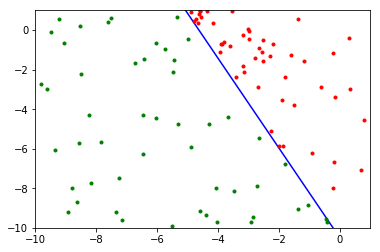

In [21]:
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import random 
import math
import Queue

def x_range(min_x, max_x, min_y, max_y, k, b):
    x1 = (min_y-b) / k
    x2 = (max_y-b) / k
    min_x_line = max(min(x1, x2),min_x)
    max_x_line = min(max(x1, x2),max_x)
    return (min_x_line,max_x_line)

def x_rangePN(min_x, max_x, min_y, max_y, min_x_line,max_x_line,angle):
    if(angle > math.pi/2):
        return min_x_line,max_x, min_x,max_x_line
    else:
        return min_x, max_x_line, min_x_line, max_x
    
def b_range(min_x, max_x, min_y, max_y, k,angle):
    if(angle > math.pi/2):
        min_b = min_y - k*min_x
        max_b = max_y - k*max_x
    else:
        min_b = min_y - k*max_x
        max_b = max_y - k*min_x
    return (min_b,max_b)

def generate_point(min_y, max_y, k,b, x_min,x_max, n_part):
    x = random.uniform(x_min,x_max)
    y_line = k * x + b
    if y_line <= max_y and y_line >= min_y:
        y = random.uniform(min_y,y_line-0.1) if(n_part) else random.uniform(y_line+0.1,max_y)
    else:
        y = random.uniform(min_y,max_y)
    return [x, y]
        
def generate_points_part( min_y, max_y, k,b, x1, x2, amount,n_part):
    q = Queue.Queue()
    q.put((x1, x2))
    xy = []
    while not q.empty() and amount > 0:
        x1,x2 = q.get()
        x = (x2+x1)/2
        q.put((x1,x))
        q.put((x,x2))
        xy_arr = generate_point( min_y, max_y, k, b,x1,x2, n_part)  
        xy.append(xy_arr)
        amount -= 1
    return xy;

def points_generator(min_x, max_x, min_y, max_y,n,p, plot_line):
    angle = random.uniform(0, math.pi)
    k = math.tan(angle)
    (min_b,max_b) = b_range(min_x, max_x, min_y, max_y, k,angle)
    b = random.uniform(min_b+0.1, max_b-0.1)
    (x1,x2) = x_range(min_x, max_x, min_y, max_y, k, b)
    p_x_min, p_x_max, n_x_min, n_x_max = x_rangePN(min_x, max_x, min_y, max_y, x1,x2, angle)
    if(plot_line):
        y1 = k*x1 + b
        y2 = k*x2 + b
        plt.plot((x1,x2),(y1,y2), 'b')
    p_x_end = p_x_max - 0.1
    n_x_end = n_x_max - 0.1
    p_x_start = p_x_min + 0.1
    n_x_start = n_x_min + 0.1
    xy_N = generate_points_part( min_y, max_y, k,b, n_x_start, n_x_end, n,True)
    xy_P = generate_points_part( min_y, max_y, k,b, p_x_start, p_x_end, p,False)
    return (xy_N + xy_P, [1] * n + [-1] * p) 
n = 50
p = 50
min_x = -10
min_y = -10
max_x = 1
max_y = 1
(xy,yi) = points_generator(min_x, max_x, min_y, max_y,n,p,True) 
plt.plot([xy[i][0] for i in range(n)],[xy[i][1] for i in range(n)], ".g")
plt.plot([xy[i][0] for i in range(n,len(xy))],[xy[i][1] for i in range(n,len(xy))], ".r")
plt.axis([-10, 1, -10, 1])
plt.show()

weights [3.7997868728109903, -18.31225262930565, -15]
iterations 14
min_margin 0.210806256965


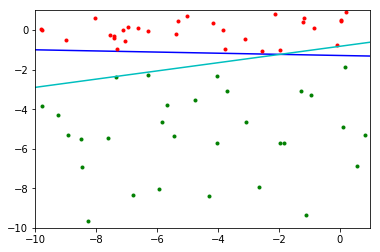

In [11]:
k = 30
min_x = -10
min_y = -10
max_x = 1
max_y = 1
(xy,yi) = points_generator(min_x,max_x,min_y,max_y, k, k,True) 
plt.plot([xy[i][0] for i in range(k)],[xy[i][1] for i in range(k)], ".g")
plt.plot([xy[i][0] for i in range(k,len(xy))],[xy[i][1] for i in range(k,len(xy))], ".r")

def batch_perceptron((xy,yi)):
    w = [0,0,0]
    iteration = 0;
    while(True):
        changed = 0;
        min_margin = 100000
        for i in xrange(0,2*k):
            xi = xy[i]+[1]
            s = 0
            for j in xrange(0,3):
                s += w[j]*xi[j]
            margin = s*yi[i]
            if(margin<min_margin):
                min_margin = margin
            if(margin <= 0):
                changed += 1
                for j in xrange(0,3):
                    w[j] += xi[j] * yi[i]
        if changed == 0:
            break
        iteration += 1
    return w,iteration,min_margin
(w,iteration,min_margin) =batch_perceptron((xy,yi))
print "weights",w
print "iterations",iteration
print "min_margin",min_margin
(x1,x2) = x_range(min_x,max_x,min_y,max_y,-w[0]/w[1], -w[2]/w[1])
y1 = -w[0]/w[1]*x1 + -w[2]/w[1]
y2 = -w[0]/w[1]*x2 + -w[2]/w[1]
plt.plot((x1,x2),(y1,y2), 'c')
plt.axis([min_x,max_x,min_y,max_y])
plt.show()

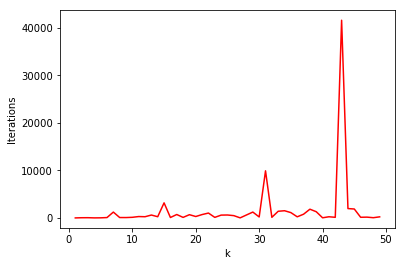

In [10]:
min_x = -10
min_y = -10
max_x = 1
max_y = 1
tries_for_k = 5
max_k = 50
avg_iterations = []
for k in range(1,max_k):
    iterations = 0;
    for i in range(tries_for_k):
        (xy,yi) = points_generator(min_x,max_x,min_y,max_y, k, k,False) 
        (w,iteration,min_margin) =batch_perceptron((xy,yi))
        iterations +=iteration
    avg_iterations.append(float(iterations)/tries_for_k)
      
plt.plot([k for k in range(1,max_k)],avg_iterations, 'r')
plt.xlabel("k")
plt.ylabel("Iterations")
plt.show()